In [2]:
import pandas as pd
import os

# Ana veriyi oku
df = pd.read_csv("airpol.csv")  # Ana CSV osyanın adı neyse yaz

# Yeni hava durumu ortalama kolonlarını tutacak liste
weather_columns = [
    "temperature_2m", "wind_speed_10m", "wind_speed_100m",
    "wind_direction_10m", "wind_direction_100m",
    "precipitation", "relative_humidity_2m", "surface_pressure",
    "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high"
]

# Her kolona boş değerle başla
for col in weather_columns:
    df[col + "_mean"] = None

# Her satır için ilgili weather CSV dosyasını oku ve ortalamaları hesapla
for idx, row in df.iterrows():
    file_id = f"id_{row['id']}.0.csv"
    file_path = os.path.join("weather_outputs", file_id)

    if os.path.exists(file_path):
        weather_df = pd.read_csv(file_path)

        for col in weather_columns:
            if col in weather_df.columns:
                df.at[idx, col + "_mean"] = weather_df[col].mean()
            else:
                print(f"Uyarı: {col} kolonu {file_id} içinde yok.")
    else:
        print(f"Hata: Dosya bulunamadı: {file_path}")

# Ortalamaları sayısal değerlere çevir
df[ [col + "_mean" for col in weather_columns] ] = df[ [col + "_mean" for col in weather_columns] ].astype(float)

# Sonuç
df.reset_index(drop=True, inplace=True)


In [3]:
df.head()

,Unnamed: 0,id,latitude,longitude,day_of_year,day_of_week,hour,month,pollution_value,temperature_2m_mean,...,wind_speed_100m_mean,wind_direction_10m_mean,wind_direction_100m_mean,precipitation_mean,relative_humidity_2m_mean,surface_pressure_mean,cloud_cover_mean,cloud_cover_low_mean,cloud_cover_mid_mean,cloud_cover_high_mean
0,0,0,51.491,-0.172,301,6,3,10,14.5,11.548161,...,18.496004,181.418776,184.274552,0.061559,87.536512,1019.971370,79.939516,56.938172,19.669355,35.401882
1,1,1,39.386,-121.158,254,3,21,9,34.5,21.075524,...,11.559699,136.876343,148.300098,0.000941,41.481347,918.225469,18.212366,2.715054,6.899194,14.434140
2,2,2,51.459,0.596,301,6,3,10,10.5,11.771624,...,18.936399,192.897523,194.192041,0.055376,87.590926,1016.215549,79.086022,54.689516,19.118280,34.229839
3,3,3,35.299,-120.613,145,2,14,5,15.5,14.318217,...,8.916401,215.451873,218.000788,0.000403,79.679247,988.116708,48.375000,43.471774,0.162634,7.638441
4,4,4,29.927,120.527,221,0,14,8,54.5,31.835946,...,15.048387,157.479798,160.352089,0.176613,63.466461,993.368239,51.598118,6.131720,16.955645,42.590054


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.head()

,id,latitude,longitude,day_of_year,day_of_week,hour,month,pollution_value,temperature_2m_mean,wind_speed_10m_mean,wind_speed_100m_mean,wind_direction_10m_mean,wind_direction_100m_mean,precipitation_mean,relative_humidity_2m_mean,surface_pressure_mean,cloud_cover_mean,cloud_cover_low_mean,cloud_cover_mid_mean,cloud_cover_high_mean
0,0,51.491,-0.172,301,6,3,10,14.5,11.548161,10.624689,18.496004,181.418776,184.274552,0.061559,87.536512,1019.971370,79.939516,56.938172,19.669355,35.401882
1,1,39.386,-121.158,254,3,21,9,34.5,21.075524,8.841593,11.559699,136.876343,148.300098,0.000941,41.481347,918.225469,18.212366,2.715054,6.899194,14.434140
2,2,51.459,0.596,301,6,3,10,10.5,11.771624,11.062152,18.936399,192.897523,194.192041,0.055376,87.590926,1016.215549,79.086022,54.689516,19.118280,34.229839
3,3,35.299,-120.613,145,2,14,5,15.5,14.318217,6.354421,8.916401,215.451873,218.000788,0.000403,79.679247,988.116708,48.375000,43.471774,0.162634,7.638441
4,4,29.927,120.527,221,0,14,8,54.5,31.835946,9.480354,15.048387,157.479798,160.352089,0.176613,63.466461,993.368239,51.598118,6.131720,16.955645,42.590054


In [7]:
df.columns

Index(['id', 'latitude', 'longitude', 'day_of_year', 'day_of_week', 'hour',
       'month', 'pollution_value', 'temperature_2m_mean',
       'wind_speed_10m_mean', 'wind_speed_100m_mean',
       'wind_direction_10m_mean', 'wind_direction_100m_mean',
       'precipitation_mean', 'relative_humidity_2m_mean',
       'surface_pressure_mean', 'cloud_cover_mean', 'cloud_cover_low_mean',
       'cloud_cover_mid_mean', 'cloud_cover_high_mean'],
      dtype='object')

In [8]:
import numpy as np
import pandas as pd

def cyclical_transform(df):
    # Saat (0-23)
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

    # Gün (haftalık, 0-6)
    df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

    # Gün (yıllık, 1-365)
    df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

    # Ay (1-12)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    
    return df

In [9]:
df = cyclical_transform(df)

In [10]:
df.head()

,id,latitude,longitude,day_of_year,day_of_week,hour,month,pollution_value,temperature_2m_mean,wind_speed_10m_mean,...,cloud_cover_mid_mean,cloud_cover_high_mean,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,month_sin,month_cos
0,0,51.491,-0.172,301,6,3,10,14.5,11.548161,10.624689,...,19.669355,35.401882,0.707107,0.707107,-0.781831,0.623490,-0.891981,0.452072,-0.866025,5.000000e-01
1,1,39.386,-121.158,254,3,21,9,34.5,21.075524,8.841593,...,6.899194,14.434140,-0.707107,0.707107,0.433884,-0.900969,-0.942761,-0.333469,-1.000000,-1.836970e-16
2,2,51.459,0.596,301,6,3,10,10.5,11.771624,11.062152,...,19.118280,34.229839,0.707107,0.707107,-0.781831,0.623490,-0.891981,0.452072,-0.866025,5.000000e-01
3,3,35.299,-120.613,145,2,14,5,15.5,14.318217,6.354421,...,0.162634,7.638441,-0.500000,-0.866025,0.974928,-0.222521,0.601624,-0.798779,0.500000,-8.660254e-01
4,4,29.927,120.527,221,0,14,8,54.5,31.835946,9.480354,...,16.955645,42.590054,-0.500000,-0.866025,0.000000,1.000000,-0.615285,-0.788305,-0.866025,-5.000000e-01


In [11]:
def add_binary_time_features(df):
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x in [0, 6] else 0) 
    df['is_night'] = df['hour'].apply(lambda x: 1 if (x >= 22 or x < 7) else 0)
    return df

df = add_binary_time_features(df)

In [12]:
df.head()

,id,latitude,longitude,day_of_year,day_of_week,hour,month,pollution_value,temperature_2m_mean,wind_speed_10m_mean,...,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,month_sin,month_cos,is_weekend,is_night
0,0,51.491,-0.172,301,6,3,10,14.5,11.548161,10.624689,...,0.707107,0.707107,-0.781831,0.623490,-0.891981,0.452072,-0.866025,5.000000e-01,1,1
1,1,39.386,-121.158,254,3,21,9,34.5,21.075524,8.841593,...,-0.707107,0.707107,0.433884,-0.900969,-0.942761,-0.333469,-1.000000,-1.836970e-16,0,0
2,2,51.459,0.596,301,6,3,10,10.5,11.771624,11.062152,...,0.707107,0.707107,-0.781831,0.623490,-0.891981,0.452072,-0.866025,5.000000e-01,1,1
3,3,35.299,-120.613,145,2,14,5,15.5,14.318217,6.354421,...,-0.500000,-0.866025,0.974928,-0.222521,0.601624,-0.798779,0.500000,-8.660254e-01,0,0
4,4,29.927,120.527,221,0,14,8,54.5,31.835946,9.480354,...,-0.500000,-0.866025,0.000000,1.000000,-0.615285,-0.788305,-0.866025,-5.000000e-01,1,0


In [14]:
df.columns

Index(['id', 'latitude', 'longitude', 'day_of_year', 'day_of_week', 'hour',
       'month', 'pollution_value', 'temperature_2m_mean',
       'wind_speed_10m_mean', 'wind_speed_100m_mean',
       'wind_direction_10m_mean', 'wind_direction_100m_mean',
       'precipitation_mean', 'relative_humidity_2m_mean',
       'surface_pressure_mean', 'cloud_cover_mean', 'cloud_cover_low_mean',
       'cloud_cover_mid_mean', 'cloud_cover_high_mean', 'hour_sin', 'hour_cos',
       'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin',
       'day_of_year_cos', 'month_sin', 'month_cos', 'is_weekend', 'is_night'],
      dtype='object')

In [15]:
def assign_season(df):
    def get_season(month):
        if month in [12, 1, 2]:
            return 'winter'
        elif month in [3, 4, 5]:
            return 'spring'
        elif month in [6, 7, 8]:
            return 'summer'
        else:
            return 'autumn'

    df['season'] = df['month'].apply(get_season)
    return df

In [16]:
df = assign_season(df)

df['season'] = df['season'].map({
    'winter': 0, 'spring': 1, 'summer': 2, 'autumn': 3
})

In [17]:
df.head()

,id,latitude,longitude,day_of_year,day_of_week,hour,month,pollution_value,temperature_2m_mean,wind_speed_10m_mean,...,hour_cos,day_of_week_sin,day_of_week_cos,day_of_year_sin,day_of_year_cos,month_sin,month_cos,is_weekend,is_night,season
0,0,51.491,-0.172,301,6,3,10,14.5,11.548161,10.624689,...,0.707107,-0.781831,0.623490,-0.891981,0.452072,-0.866025,5.000000e-01,1,1,3
1,1,39.386,-121.158,254,3,21,9,34.5,21.075524,8.841593,...,0.707107,0.433884,-0.900969,-0.942761,-0.333469,-1.000000,-1.836970e-16,0,0,3
2,2,51.459,0.596,301,6,3,10,10.5,11.771624,11.062152,...,0.707107,-0.781831,0.623490,-0.891981,0.452072,-0.866025,5.000000e-01,1,1,3
3,3,35.299,-120.613,145,2,14,5,15.5,14.318217,6.354421,...,-0.866025,0.974928,-0.222521,0.601624,-0.798779,0.500000,-8.660254e-01,0,0,1
4,4,29.927,120.527,221,0,14,8,54.5,31.835946,9.480354,...,-0.866025,0.000000,1.000000,-0.615285,-0.788305,-0.866025,-5.000000e-01,1,0,2


In [19]:
df.columns

Index(['id', 'latitude', 'longitude', 'day_of_year', 'day_of_week', 'hour',
       'month', 'pollution_value', 'temperature_2m_mean',
       'wind_speed_10m_mean', 'wind_speed_100m_mean',
       'wind_direction_10m_mean', 'wind_direction_100m_mean',
       'precipitation_mean', 'relative_humidity_2m_mean',
       'surface_pressure_mean', 'cloud_cover_mean', 'cloud_cover_low_mean',
       'cloud_cover_mid_mean', 'cloud_cover_high_mean', 'hour_sin', 'hour_cos',
       'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin',
       'day_of_year_cos', 'month_sin', 'month_cos', 'is_weekend', 'is_night',
       'season'],
      dtype='object')

In [20]:
import sys
!{sys.executable} -m pip install kneed


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Elbow hesaplanıyor: 100%|██████████| 300/300 [00:16<00:00, 17.96it/s]


🔍 Otomatik olarak tespit edilen optimum küme sayısı: 10


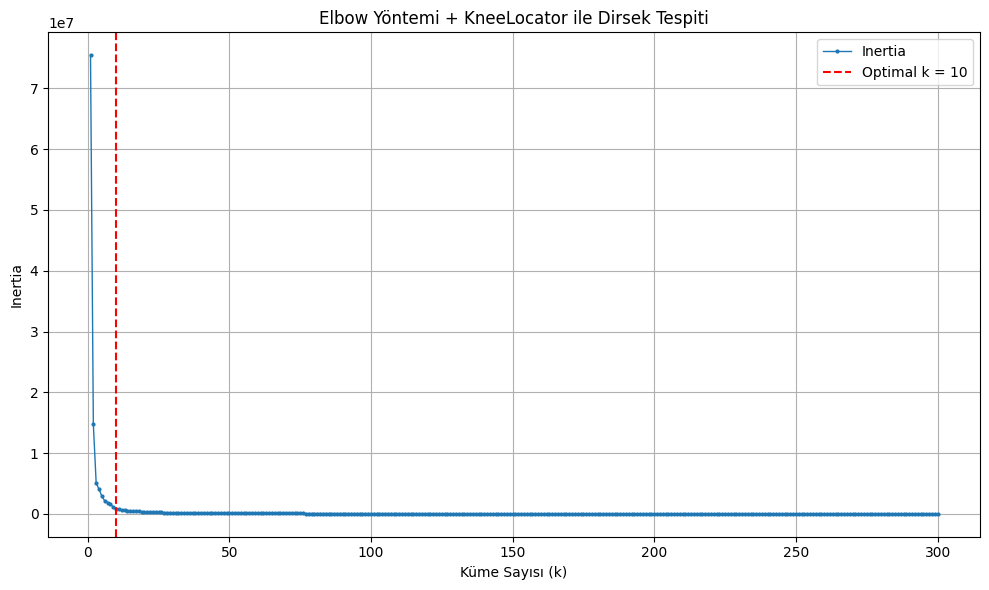

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm
from kneed import KneeLocator

# Enlem-boylam verisi
coords = df[['latitude', 'longitude']].copy()

# Küme sayısı aralığı
K_range = range(1, 301)
inertia = []

# Inertia hesapla
for k in tqdm(K_range, desc="Elbow hesaplanıyor"):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(coords)
    inertia.append(kmeans.inertia_)

# Otomatik dirsek noktası (optimal k) tespiti
knee = KneeLocator(K_range, inertia, curve="convex", direction="decreasing")
optimal_k = knee.knee
print(f"🔍 Otomatik olarak tespit edilen optimum küme sayısı: {optimal_k}")

# Elbow grafiği + dirsek noktası
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', markersize=2, linewidth=1, label='Inertia')
plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia')
plt.title('Elbow Yöntemi + KneeLocator ile Dirsek Tespiti')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(coords)

In [30]:
df.columns

Index(['id', 'latitude', 'longitude', 'day_of_year', 'day_of_week', 'hour',
       'month', 'pollution_value', 'temperature_2m_mean',
       'wind_speed_10m_mean', 'wind_speed_100m_mean',
       'wind_direction_10m_mean', 'wind_direction_100m_mean',
       'precipitation_mean', 'relative_humidity_2m_mean',
       'surface_pressure_mean', 'cloud_cover_mean', 'cloud_cover_low_mean',
       'cloud_cover_mid_mean', 'cloud_cover_high_mean', 'hour_sin', 'hour_cos',
       'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin',
       'day_of_year_cos', 'month_sin', 'month_cos', 'is_weekend', 'is_night',
       'season', 'cluster'],
      dtype='object')

In [31]:
df.to_csv("nmsairpol.csv")